In [38]:
from IPython.display import display, HTML, Markdown

import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from keras.models import Sequential
from keras.layers import Dense, Flatten 
from sklearn.model_selection import train_test_split
import tensorflow.keras
    
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 5)

In [3]:
dataset_df_body = pd.read_csv("https://raw.githubusercontent.com/ArthurFDLR/pose-classification-kit/master/pose_classification_kit/datasets/BodyPose_Dataset.csv")
labels = list(dataset_df_body['label'].astype('category').cat.categories)


labels_body = dataset_df_body.label.unique()
labels_body 

array(['Seated', 'Stand', 'Stand_RightArmRaised', 'Stand_LeftArmRaised',
       'T', 'MilitarySalute', 'PushUp_Low', 'Squat', 'Plank',
       'Yoga_Tree_left', 'Yoga_Tree_right', 'Yoga_UpwardSalute',
       'Yoga_Warrior2_left', 'Yoga_Warrior2_right', 'Traffic_AllStop',
       'Traffic_BackStop', 'Traffic_FrontStop', 'Traffic_BackFrontStop',
       'Traffic_LeftTurn', 'Traffic_RightTurn'], dtype=object)

In [5]:
display(Markdown("### Complete dataset view"))
display(dataset_df_body)

df_body_labels = dataset_df_body.groupby('label')

display(Markdown("### Number of samples per label"))
display(
    pd.DataFrame(
        [df_body_labels.size()],
        columns=labels_body,
        index=["Nbr of entries"],
        )
)

### Complete dataset view

,label,accuracy,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21,x22,y22,x23,y23,x24,y24
0,Seated,19.508690,-0.060776,0.497554,-0.085367,0.360305,-0.206404,0.359822,-0.254659,0.157586,-0.068586,0.093048,0.003926,0.367953,0.052554,0.198201,0.052288,0.101291,-0.069057,0.084698,-0.141862,0.068745,-0.003900,-0.117274,0.125038,-0.424617,0.003923,0.092650,0.190280,-0.093207,0.157517,-0.424847,-0.076973,0.537926,-0.020513,0.537848,-0.133506,0.529790,-0.004316,0.521619,0.246689,-0.537926,0.254659,-0.505494,0.125220,-0.481106,0.238224,-0.529721,0.181949,-0.529865,0.117234,-0.472980
1,Seated,19.548573,-0.064262,0.501585,-0.088978,0.364251,-0.210033,0.363897,-0.250737,0.161617,-0.072216,0.097050,0.000255,0.364359,0.048789,0.202146,0.048557,0.105223,-0.072845,0.088723,-0.145644,0.072785,-0.007609,-0.113116,0.113625,-0.420526,0.000118,0.096654,0.186695,-0.089216,0.153778,-0.428637,-0.080508,0.541949,-0.023966,0.541849,-0.136952,0.533824,-0.007863,0.517799,0.242809,-0.541949,0.250737,-0.517829,0.121459,-0.477317,0.218503,-0.525648,0.170166,-0.525665,0.113249,-0.468936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,Traffic_RightTurn,21.680399,-0.021659,0.501895,-0.015683,0.355273,-0.119264,0.361134,-0.266577,0.355392,-0.303121,0.483898,0.076649,0.354854,0.180719,0.226502,0.303121,0.122409,-0.015105,0.024694,-0.070423,0.024707,-0.058290,-0.202152,-0.064057,-0.434731,0.058023,0.024591,0.039612,-0.202141,0.039709,-0.428982,-0.052122,0.508097,-0.015073,0.508319,-0.070571,0.471654,0.027508,0.483822,0.076463,-0.502156,0.100901,-0.483695,0.027589,-0.459371,-0.058080,-0.508319,-0.076766,-0.495978,-0.052033,-0.465198
10680,Traffic_RightTurn,21.511433,-0.024451,0.499075,-0.023881,0.353047,-0.121352,0.358971,-0.273786,0.352725,-0.310223,0.492587,0.073386,0.352577,0.182848,0.219032,0.310224,0.109508,-0.017902,0.030272,-0.073136,0.030321,-0.060756,-0.189073,-0.054509,-0.432380,0.060988,0.024236,0.030632,-0.213052,0.030603,-0.432394,-0.048443,0.511201,0.000077,0.517217,-0.073053,0.486682,0.024655,0.492595,0.060882,-0.511212,0.079464,-0.487036,0.024246,-0.462584,-0.048566,-0.517217,-0.079074,-0.499119,-0.036438,-0.468462


### Number of samples per label

,Seated,Stand,Stand_RightArmRaised,Stand_LeftArmRaised,T,MilitarySalute,PushUp_Low,Squat,Plank,Yoga_Tree_left,Yoga_Tree_right,Yoga_UpwardSalute,Yoga_Warrior2_left,Yoga_Warrior2_right,Traffic_AllStop,Traffic_BackStop,Traffic_FrontStop,Traffic_BackFrontStop,Traffic_LeftTurn,Traffic_RightTurn
Nbr of entries,606,521,503,534,503,524,508,552,535,580,502,526,521,515,571,560,528,516,555,521


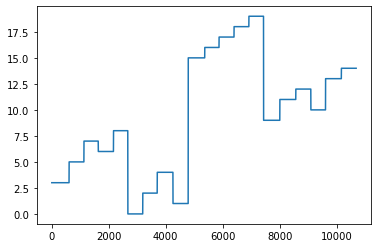

In [6]:
l = np.array(dataset_df_body['label'].astype('category').cat.codes)

plt.plot(l)

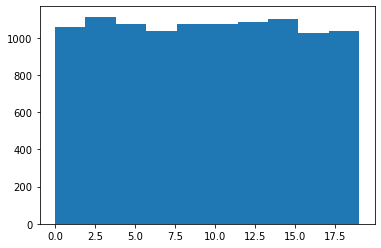

In [7]:
hist = plt.hist(l)

In [8]:
dataset_df_body.head()

,label,accuracy,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21,x22,y22,x23,y23,x24,y24
0,Seated,19.508690,-0.060776,0.497554,-0.085367,0.360305,-0.206404,0.359822,-0.254659,0.157586,-0.068586,0.093048,0.003926,0.367953,0.052554,0.198201,0.052288,0.101291,-0.069057,0.084698,-0.141862,0.068745,-0.003900,-0.117274,0.125038,-0.424617,0.003923,0.092650,0.190280,-0.093207,0.157517,-0.424847,-0.076973,0.537926,-0.020513,0.537848,-0.133506,0.529790,-0.004316,0.521619,0.246689,-0.537926,0.254659,-0.505494,0.125220,-0.481106,0.238224,-0.529721,0.181949,-0.529865,0.117234,-0.472980
1,Seated,19.548573,-0.064262,0.501585,-0.088978,0.364251,-0.210033,0.363897,-0.250737,0.161617,-0.072216,0.097050,0.000255,0.364359,0.048789,0.202146,0.048557,0.105223,-0.072845,0.088723,-0.145644,0.072785,-0.007609,-0.113116,0.113625,-0.420526,0.000118,0.096654,0.186695,-0.089216,0.153778,-0.428637,-0.080508,0.541949,-0.023966,0.541849,-0.136952,0.533824,-0.007863,0.517799,0.242809,-0.541949,0.250737,-0.517829,0.121459,-0.477317,0.218503,-0.525648,0.170166,-0.525665,0.113249,-0.468936
2,Seated,19.589640,-0.057000,0.505776,-0.089626,0.367261,-0.211719,0.366885,-0.252852,0.162913,-0.072807,0.097765,0.000318,0.367411,0.049339,0.195856,0.049053,0.105991,-0.073453,0.089374,-0.146830,0.073306,-0.007647,-0.106416,0.114522,-0.424312,0.000158,0.089803,0.188336,-0.090072,0.155185,-0.424714,-0.081099,0.546507,-0.016530,0.546399,-0.138048,0.538245,-0.007815,0.514196,0.244824,-0.546507,0.252852,-0.522180,0.122626,-0.481395,0.212437,-0.522180,0.171498,-0.530216,0.114273,-0.473121
3,Seated,19.537535,-0.052124,0.495743,-0.084082,0.360026,-0.203792,0.359649,-0.251624,0.159750,-0.060108,0.095835,0.004095,0.360190,0.052094,0.199770,0.051788,0.103928,-0.068044,0.087651,-0.139979,0.071865,-0.003723,-0.112085,0.123674,-0.416107,0.004100,0.095523,0.195810,-0.095669,0.148086,-0.416189,-0.075719,0.535619,-0.012478,0.535508,-0.131505,0.519791,-0.003971,0.503835,0.243730,-0.535619,0.251624,-0.511733,0.123945,-0.471659,0.235603,-0.519964,0.179967,-0.527744,0.115989,-0.463934
4,Seated,19.480042,-0.052567,0.496677,-0.084950,0.359539,-0.205768,0.359155,-0.254100,0.157368,-0.068285,0.092843,0.004042,0.359682,0.052634,0.189829,0.052315,0.100993,-0.068748,0.084618,-0.141399,0.068696,-0.003848,-0.116990,0.117269,-0.424062,0.004105,0.092567,0.190115,-0.093083,0.157243,-0.431769,-0.076468,0.536940,-0.012605,0.536910,-0.132841,0.520891,-0.004019,0.512732,0.246225,-0.536940,0.254100,-0.512534,0.125114,-0.480362,0.229941,-0.528569,0.181448,-0.528767,0.117060,-0.479984


In [12]:
dataset_df_body.tail()

,label,accuracy,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21,x22,y22,x23,y23,x24,y24
10676,Traffic_RightTurn,21.630013,-0.000070,0.502426,-0.000326,0.360815,-0.098866,0.366798,-0.271326,0.367044,-0.289795,0.514573,0.086378,0.354612,0.185033,0.219088,0.289795,0.126366,0.006223,0.027899,-0.049538,0.027726,-0.006274,-0.212535,0.006380,-0.434705,0.067966,0.033907,0.098590,-0.194253,0.104871,-0.428252,-0.030740,0.508930,0.012260,0.514547,-0.049660,0.483981,0.049143,0.477924,0.147675,-0.483970,0.160317,-0.471781,0.098497,-0.440848,0.012351,-0.514573,-0.012219,-0.502346,0.018613,-0.459356
10677,Traffic_RightTurn,21.483974,-0.033529,0.497803,-0.033420,0.356488,-0.125886,0.362372,-0.285587,0.362326,-0.292023,0.497774,0.064903,0.350368,0.181336,0.215494,0.292023,0.123090,-0.003079,0.024941,-0.082605,0.030813,-0.045743,-0.202527,-0.039487,-0.436087,0.052540,0.024838,0.052624,-0.196492,0.064678,-0.430215,-0.045959,0.504155,-0.002881,0.509828,-0.082771,0.473316,0.015620,0.479233,0.101549,-0.497483,0.126103,-0.479197,0.052553,-0.466615,-0.033426,-0.509828,-0.052182,-0.497552,-0.021469,-0.466634
10678,Traffic_RightTurn,21.707335,-0.018693,0.498812,-0.006691,0.357152,-0.110961,0.363098,-0.264897,0.357454,-0.295596,0.498612,0.085883,0.351011,0.190534,0.221770,0.295596,0.123394,-0.006090,0.024856,-0.061821,0.024807,-0.049181,-0.209089,-0.049094,-0.437092,0.055152,0.024790,0.049319,-0.203115,0.055334,-0.431194,-0.049263,0.505189,-0.006045,0.510892,-0.061864,0.474154,0.036632,0.480249,0.092212,-0.498653,0.116724,-0.480364,0.043144,-0.467566,-0.043086,-0.510892,-0.061822,-0.498516,-0.036982,-0.467663
10679,Traffic_RightTurn,21.680399,-0.021659,0.501895,-0.015683,0.355273,-0.119264,0.361134,-0.266577,0.355392,-0.303121,0.483898,0.076649,0.354854,0.180719,0.226502,0.303121,0.122409,-0.015105,0.024694,-0.070423,0.024707,-0.058290,-0.202152,-0.064057,-0.434731,0.058023,0.024591,0.039612,-0.202141,0.039709,-0.428982,-0.052122,0.508097,-0.015073,0.508319,-0.070571,0.471654,0.027508,0.483822,0.076463,-0.502156,0.100901,-0.483695,0.027589,-0.459371,-0.058080,-0.508319,-0.076766,-0.495978,-0.052033,-0.465198
10680,Traffic_RightTurn,21.511433,-0.024451,0.499075,-0.023881,0.353047,-0.121352,0.358971,-0.273786,0.352725,-0.310223,0.492587,0.073386,0.352577,0.182848,0.219032,0.310224,0.109508,-0.017902,0.030272,-0.073136,0.030321,-0.060756,-0.189073,-0.054509,-0.432380,0.060988,0.024236,0.030632,-0.213052,0.030603,-0.432394,-0.048443,0.511201,0.000077,0.517217,-0.073053,0.486682,0.024655,0.492595,0.060882,-0.511212,0.079464,-0.487036,0.024246,-0.462584,-0.048566,-0.517217,-0.079074,-0.499119,-0.036438,-0.468462


In [13]:
dataset_df_body.shape

(10681, 52)

In [14]:
dataset_df_body['category'] = dataset_df_body['label'].astype('category').cat.codes
dataset_df_body

,label,accuracy,x0,y0,x1,y1,x2,y2,x3,y3,x4,y4,x5,y5,x6,y6,x7,y7,x8,y8,x9,y9,x10,y10,x11,y11,x12,y12,x13,y13,x14,y14,x15,y15,x16,y16,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21,x22,y22,x23,y23,x24,y24,category
0,Seated,19.508690,-0.060776,0.497554,-0.085367,0.360305,-0.206404,0.359822,-0.254659,0.157586,-0.068586,0.093048,0.003926,0.367953,0.052554,0.198201,0.052288,0.101291,-0.069057,0.084698,-0.141862,0.068745,-0.003900,-0.117274,0.125038,-0.424617,0.003923,0.092650,0.190280,-0.093207,0.157517,-0.424847,-0.076973,0.537926,-0.020513,0.537848,-0.133506,0.529790,-0.004316,0.521619,0.246689,-0.537926,0.254659,-0.505494,0.125220,-0.481106,0.238224,-0.529721,0.181949,-0.529865,0.117234,-0.472980,3
1,Seated,19.548573,-0.064262,0.501585,-0.088978,0.364251,-0.210033,0.363897,-0.250737,0.161617,-0.072216,0.097050,0.000255,0.364359,0.048789,0.202146,0.048557,0.105223,-0.072845,0.088723,-0.145644,0.072785,-0.007609,-0.113116,0.113625,-0.420526,0.000118,0.096654,0.186695,-0.089216,0.153778,-0.428637,-0.080508,0.541949,-0.023966,0.541849,-0.136952,0.533824,-0.007863,0.517799,0.242809,-0.541949,0.250737,-0.517829,0.121459,-0.477317,0.218503,-0.525648,0.170166,-0.525665,0.113249,-0.468936,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10679,Traffic_RightTurn,21.680399,-0.021659,0.501895,-0.015683,0.355273,-0.119264,0.361134,-0.266577,0.355392,-0.303121,0.483898,0.076649,0.354854,0.180719,0.226502,0.303121,0.122409,-0.015105,0.024694,-0.070423,0.024707,-0.058290,-0.202152,-0.064057,-0.434731,0.058023,0.024591,0.039612,-0.202141,0.039709,-0.428982,-0.052122,0.508097,-0.015073,0.508319,-0.070571,0.471654,0.027508,0.483822,0.076463,-0.502156,0.100901,-0.483695,0.027589,-0.459371,-0.058080,-0.508319,-0.076766,-0.495978,-0.052033,-0.465198,14
10680,Traffic_RightTurn,21.511433,-0.024451,0.499075,-0.023881,0.353047,-0.121352,0.358971,-0.273786,0.352725,-0.310223,0.492587,0.073386,0.352577,0.182848,0.219032,0.310224,0.109508,-0.017902,0.030272,-0.073136,0.030321,-0.060756,-0.189073,-0.054509,-0.432380,0.060988,0.024236,0.030632,-0.213052,0.030603,-0.432394,-0.048443,0.511201,0.000077,0.517217,-0.073053,0.486682,0.024655,0.492595,0.060882,-0.511212,0.079464,-0.487036,0.024246,-0.462584,-0.048566,-0.517217,-0.079074,-0.499119,-0.036438,-0.468462,14


In [15]:
datas = dataset_df_body.drop(['label','accuracy'], axis=1).to_numpy()
datas.shape
X = datas[:, 0:50]
Y = datas[:, 50]
Y

array([ 3.,  3.,  3., ..., 14., 14., 14.])

In [16]:
datas.shape

(10681, 51)

In [17]:
pose = X[np.where(Y == 12)[0]]

In [18]:
pose.shape

(528, 50)

In [19]:
posePartPairs={
    "Torso":[1, 8], 
    "Shoulder (right)":[1, 2],
    "Shoulder (left)":[1, 5],
    "Arm (right)":[2, 3],
    "Forearm (right)":[3, 4],
    "Arm (left)":[5, 6],
    "Forearm (left)":[6, 7],
    "Hip (right)":[8, 9],
    "Thigh (right)":[9, 10],
    "Leg (right)":[10, 11],
    "Hip (left)":[8, 12],
    "Thigh (left)":[12, 13],
    "Leg (left)":[13, 14],
    "Neck":[1, 0],
   ##" "Eye (right)":[0, 15],
   ##" "Ear (right)":[15, 17],
   ##" "Eye (left)":[0, 16],
  ##"  "Ear (left)":[16, 18],
  ##"  ##"Foot (left)":[14, 19],
    ##""Toe (left)":[19, 20],
   ##" "Heel (left)":[14, 21],
    ##""Foot (right)":[11, 22],
   ##" "Toe (right)":[22, 23],
   ##" "Heel (right)":[11, 24],
}
color_map = plt.cm.get_cmap("nipy_spectral", len(posePartPairs))

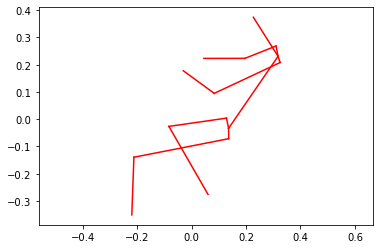

In [20]:
plt.axis('equal')
sample2d = X[200].reshape(-1,2)
for i,p in enumerate(posePartPairs.values()):
     plt.plot(*sample2d[p].T, 'r' )           

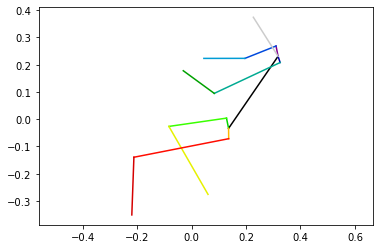

In [21]:
color_map = plt.cm.get_cmap("nipy_spectral", len(posePartPairs))
plt.axis('equal')
sample2d = X[200].reshape(-1,2)
for i,p in enumerate(posePartPairs.values()):
     plt.plot(*sample2d[p].T, c=color_map(i))   

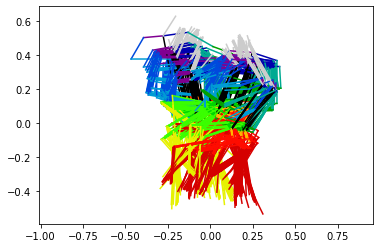

In [25]:
plt.axis('equal')

for j in range(200) :
    sample2d = X[j].reshape(-1,2)
    for i,p in enumerate(posePartPairs.values()):
         plt.plot(*sample2d[p].T, c=color_map(i))   

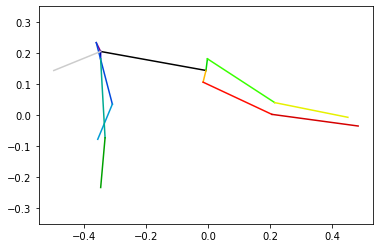

In [16]:
pose = X[np.where(Y == 1)[0]]
plt.axis('equal')
sample2d = pose[0].reshape(-1,2)
for i,p in enumerate(posePartPairs.values()):
     plt.plot(*sample2d[p].T, c=color_map(i) )  

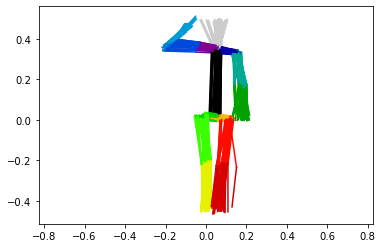

In [17]:
plt.axis('equal')

pose = X[np.where(Y == 0)[0]]

for j in range(80) :
    sample2d = pose[j].reshape(-1,2)
    for i,p in enumerate(posePartPairs.values()):
         plt.plot(*sample2d[p].T, c=color_map(i))   

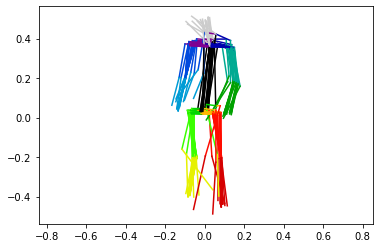

In [18]:
plt.axis('equal')

pose = X[np.where(Y == 5)[0]]

for j in range(20) :
    sample2d = pose[j].reshape(-1,2)
    for i,p in enumerate(posePartPairs.values()):
         plt.plot(*sample2d[p].T, c=color_map(i))   

(9612, 51)
(1069, 51)


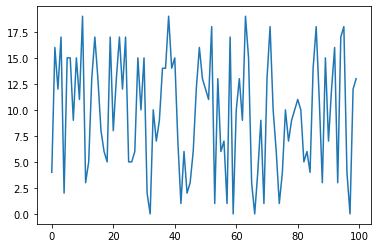

In [19]:
Train, Test = train_test_split(datas, test_size=0.1)
print(Train.shape)
print(Test.shape)

plt.plot(Train[0:100, 50])

In [29]:
ax.axis('equal')              
                ax.set_title(labels[r])        

IndentationError: unexpected indent (<ipython-input-29-8ec8ce7349ef>, line 2)

IndexError: index 8 is out of bounds for axis 0 with size 5

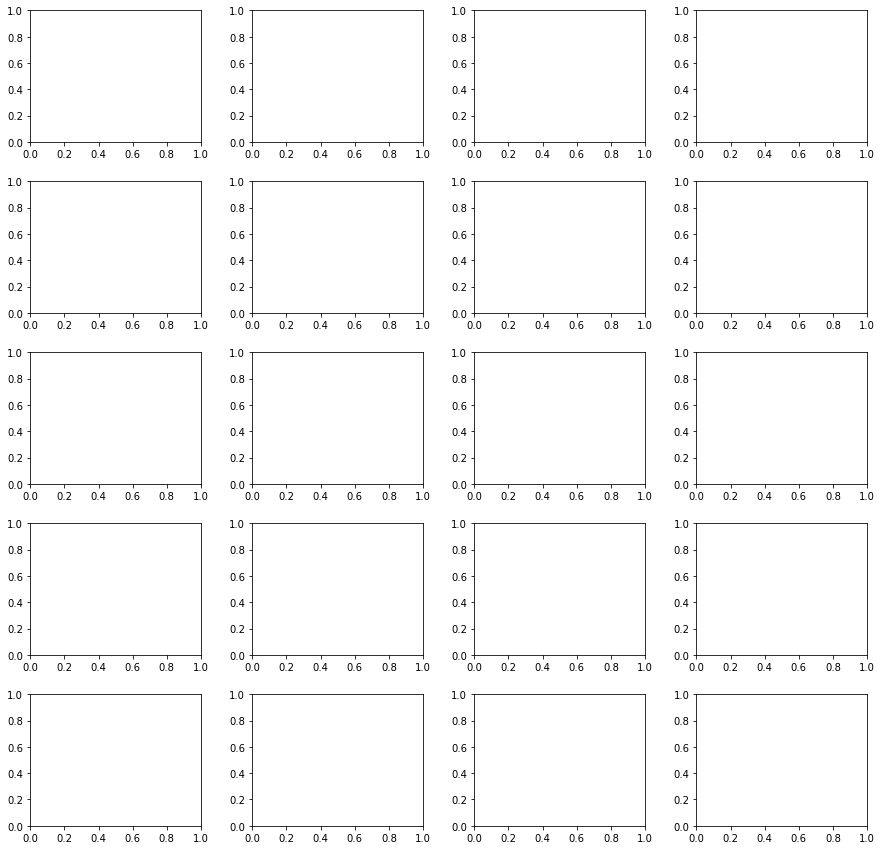

In [48]:
plt.subplots(5,4,figsize=(15,15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

for r in range(20):
    pose = X[np.where(Y == r)[0]]
    for j in range(20) :
        sample2d = pose[j].reshape(-1,2)
        for i,p in enumerate(posePartPairs.values()):
            ax = plt.subplot(5, 4, r+1)                                
            ax.plot(*sample2d[p].T, c=color_map(i))
            ax.axis('equal')              
            ax.axis('off')              
            ax.set_title(labels[r])               

## 데이터학습

In [31]:
Train, Test = train_test_split(datas, test_size=0.1)
X = Train[:, 0:50]
Y = Train[:, 50]

In [32]:
model = Sequential()
model.add(Dense(20, input_dim=50, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
model.fit(X, Y, epochs=200, verbose=1)
X_T = Test[:, 0:50]
Y_T = Test[:, 50]
model.evaluate(X_T, Y_T)

Epoch 1/200
301/301 [==============================] - 2s 661us/step - loss: 2.9093 - accuracy: 0.1642
Epoch 2/200
301/301 [==============================] - 0s 622us/step - loss: 2.5177 - accuracy: 0.5227
Epoch 3/200
301/301 [==============================] - 0s 675us/step - loss: 2.2215 - accuracy: 0.6610
Epoch 4/200
301/301 [==============================] - 0s 645us/step - loss: 1.9901 - accuracy: 0.7134
Epoch 5/200
301/301 [==============================] - 0s 814us/step - loss: 1.8109 - accuracy: 0.7418
Epoch 6/200
301/301 [==============================] - 0s 775us/step - loss: 1.6617 - accuracy: 0.7574
Epoch 7/200
301/301 [==============================] - 0s 841us/step - loss: 1.5395 - accuracy: 0.7966
Epoch 8/200
301/301 [==============================] - 0s 874us/step - loss: 1.4404 - accuracy: 0.8107
Epoch 9/200
301/301 [==============================] - 0s 808us/step - loss: 1.3471 - accuracy: 0.7959
Epoch 10/200
301/301 [==============================] - 0s 801us/step - l

301/301 [==============================] - 0s 628us/step - loss: 0.2577 - accuracy: 0.9622
Epoch 80/200
301/301 [==============================] - 0s 595us/step - loss: 0.2552 - accuracy: 0.9635
Epoch 81/200
301/301 [==============================] - 0s 578us/step - loss: 0.2479 - accuracy: 0.9651
Epoch 82/200
301/301 [==============================] - 0s 575us/step - loss: 0.2502 - accuracy: 0.9646
Epoch 83/200
301/301 [==============================] - 0s 555us/step - loss: 0.2487 - accuracy: 0.9664
Epoch 84/200
301/301 [==============================] - 0s 638us/step - loss: 0.2432 - accuracy: 0.9682
Epoch 85/200
301/301 [==============================] - 0s 562us/step - loss: 0.2432 - accuracy: 0.9650
Epoch 86/200
301/301 [==============================] - 0s 592us/step - loss: 0.2429 - accuracy: 0.9643
Epoch 87/200
301/301 [==============================] - 0s 615us/step - loss: 0.2374 - accuracy: 0.9673
Epoch 88/200
301/301 [==============================] - 0s 675us/step - loss:

301/301 [==============================] - 0s 1ms/step - loss: 0.1428 - accuracy: 0.9767
Epoch 157/200
301/301 [==============================] - 0s 928us/step - loss: 0.1435 - accuracy: 0.9769
Epoch 158/200
301/301 [==============================] - 0s 688us/step - loss: 0.1378 - accuracy: 0.9783
Epoch 159/200
301/301 [==============================] - 0s 612us/step - loss: 0.1470 - accuracy: 0.9751
Epoch 160/200
301/301 [==============================] - 0s 755us/step - loss: 0.1405 - accuracy: 0.9781
Epoch 161/200
301/301 [==============================] - 0s 911us/step - loss: 0.1412 - accuracy: 0.9784
Epoch 162/200
301/301 [==============================] - 0s 834us/step - loss: 0.1370 - accuracy: 0.9787
Epoch 163/200
301/301 [==============================] - 0s 1ms/step - loss: 0.1346 - accuracy: 0.9789
Epoch 164/200
301/301 [==============================] - 0s 1ms/step - loss: 0.1398 - accuracy: 0.9779
Epoch 165/200
301/301 [==============================] - 0s 904us/step - lo

[0.14360862970352173, 0.9691300392150879]

In [64]:
print(X.shape)
print(X_T.shape)
print(Y.shape)
print(Y_T.shape)

(9612, 50)
(1069, 50)
(9612,)
(1069,)


In [65]:
model = Sequential()
model.add(Dense(100, activation='relu',input_shape=(50,)))
model.add(Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist= model.fit(X, Y, epochs=50, verbose=1)

Epoch 1/50
301/301 [==============================] - 0s 507us/step - loss: 2.1318 - accuracy: 0.5317
Epoch 2/50
301/301 [==============================] - 0s 502us/step - loss: 0.8717 - accuracy: 0.8562
Epoch 3/50
301/301 [==============================] - 0s 498us/step - loss: 0.4738 - accuracy: 0.9046
Epoch 4/50
301/301 [==============================] - 0s 497us/step - loss: 0.3236 - accuracy: 0.9293
Epoch 5/50
301/301 [==============================] - 0s 502us/step - loss: 0.2469 - accuracy: 0.9457
Epoch 6/50
301/301 [==============================] - 0s 502us/step - loss: 0.2002 - accuracy: 0.9594
Epoch 7/50
301/301 [==============================] - 0s 515us/step - loss: 0.1679 - accuracy: 0.9680
Epoch 8/50
301/301 [==============================] - 0s 479us/step - loss: 0.1435 - accuracy: 0.9739
Epoch 9/50
301/301 [==============================] - 0s 499us/step - loss: 0.1230 - accuracy: 0.9793
Epoch 10/50
301/301 [==============================] - 0s 499us/step - loss: 0.107

In [34]:
model.evaluate(X_T, Y_T)

34/34 [==============================] - 0s 937us/step - loss: 0.1436 - accuracy: 0.9691


[0.14360862970352173, 0.9691300392150879]

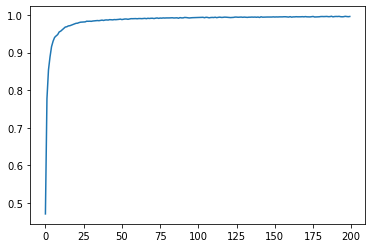

In [39]:
plt.plot(hist.history['accuracy'])

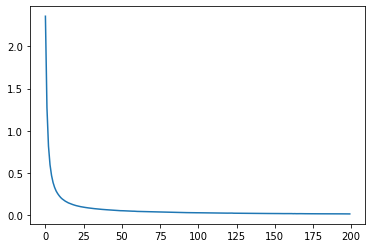

In [40]:
plt.plot(hist.history['loss'])

In [37]:
#features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27]  # full-body
#features = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]    #  upper body
#features = [16,17,18,19,20,21,22,23,24,25,26,27]  #  lower body
#features = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,22,23,24,25]    # without nee

# 0,4,7,11,14
features = [0,1,8,9,14,15,22,23,28,29]    #  edge

X = Train[:, features]
Y = Train[:, 50]

model = Sequential()
model.add(Dense(100, activation='relu',input_shape=(len(features),)))
model.add(Dense(20, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist= model.fit(X, Y, epochs=200, verbose=1)

X_T = Test[:, features]
Y_T = Test[:, 50]
model.evaluate(X_T, Y_T)

Epoch 1/200
301/301 [==============================] - 1s 811us/step - loss: 2.6930 - accuracy: 0.2831
Epoch 2/200
301/301 [==============================] - 0s 735us/step - loss: 1.4459 - accuracy: 0.7574
Epoch 3/200
301/301 [==============================] - 0s 721us/step - loss: 0.8959 - accuracy: 0.8390
Epoch 4/200
301/301 [==============================] - 0s 701us/step - loss: 0.6483 - accuracy: 0.8732
Epoch 5/200
301/301 [==============================] - 0s 638us/step - loss: 0.4900 - accuracy: 0.9144
Epoch 6/200
301/301 [==============================] - 0s 662us/step - loss: 0.4045 - accuracy: 0.9282
Epoch 7/200
301/301 [==============================] - 0s 691us/step - loss: 0.3322 - accuracy: 0.9396
Epoch 8/200
301/301 [==============================] - 0s 698us/step - loss: 0.2936 - accuracy: 0.9416
Epoch 9/200
301/301 [==============================] - 0s 668us/step - loss: 0.2733 - accuracy: 0.9437
Epoch 10/200
301/301 [==============================] - 0s 741us/step - l

301/301 [==============================] - 0s 844us/step - loss: 0.0317 - accuracy: 0.9933
Epoch 80/200
301/301 [==============================] - 0s 672us/step - loss: 0.0344 - accuracy: 0.9924
Epoch 81/200
301/301 [==============================] - 0s 645us/step - loss: 0.0345 - accuracy: 0.9927
Epoch 82/200
301/301 [==============================] - 0s 698us/step - loss: 0.0343 - accuracy: 0.9915
Epoch 83/200
301/301 [==============================] - 0s 768us/step - loss: 0.0313 - accuracy: 0.9929
Epoch 84/200
301/301 [==============================] - 0s 878us/step - loss: 0.0345 - accuracy: 0.9927
Epoch 85/200
301/301 [==============================] - 0s 675us/step - loss: 0.0327 - accuracy: 0.9917
Epoch 86/200
301/301 [==============================] - 0s 814us/step - loss: 0.0351 - accuracy: 0.9923
Epoch 87/200
301/301 [==============================] - 0s 831us/step - loss: 0.0296 - accuracy: 0.9930
Epoch 88/200
301/301 [==============================] - 0s 781us/step - loss:

301/301 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9948
Epoch 158/200
301/301 [==============================] - 0s 1ms/step - loss: 0.0171 - accuracy: 0.9954
Epoch 159/200
301/301 [==============================] - 0s 861us/step - loss: 0.0188 - accuracy: 0.9953
Epoch 160/200
301/301 [==============================] - 0s 1ms/step - loss: 0.0190 - accuracy: 0.9937
Epoch 161/200
301/301 [==============================] - 0s 1ms/step - loss: 0.0182 - accuracy: 0.9952
Epoch 162/200
301/301 [==============================] - 0s 795us/step - loss: 0.0136 - accuracy: 0.9953
Epoch 163/200
301/301 [==============================] - 0s 1ms/step - loss: 0.0175 - accuracy: 0.9954
Epoch 164/200
301/301 [==============================] - 0s 1ms/step - loss: 0.0163 - accuracy: 0.9953
Epoch 165/200
301/301 [==============================] - 0s 868us/step - loss: 0.0180 - accuracy: 0.9948
Epoch 166/200
301/301 [==============================] - 0s 1ms/step - loss: 0.01

[0.09165537357330322, 0.9859681725502014]